In [1]:
"the sum of 1+2 is {}".format(1+2)

'the sum of 1+2 is 3'

In [2]:
!pip install psycopg2

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.6/380.6 KB 8.5 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for psycopg2: filename=psycopg2-2.9.3-cp38-cp38-linux_x86_64.whl size=485318 sha256=6a4ed93ee92df5792cffd989f67c16786904732fa577a30b1984c4b6d113ef86
  Stored in directory: /home/ec2-user/.cache/pip/wheels/f3/dc/e2/b8e0e2142eff7fd680295ecd2d92e3bfbb90195523e43da161
Successfully built psycopg2
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [1]:
import pandas
import configparser
import psycopg2

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [4]:
sql_statemnet ="""
                select bathroom, bedroom
                from public.house_price_full
                where bathroom>2"""

In [5]:
df=pandas.read_sql_query(sql_statemnet,conn)

df[:10]

,bathroom,bedroom
0,3,4
1,3,4
2,3,5
3,3,4
4,3,4
5,3,3
6,3,5
7,4,5
8,3,4
9,3,4


In [6]:
sql_statement ="""
                select built_in,
                avg(price) as avg_price
                from public.house_price_full
                group by built_in
                order by built_in"""

<AxesSubplot:xlabel='built_in'>

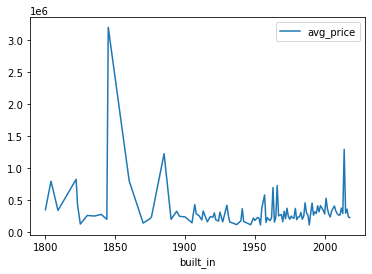

In [7]:
df_price = pandas.read_sql_query(sql_statement,conn)

df_price.plot(x='built_in',y='avg_price')